In [1]:
import pgmpy

In [2]:
from pgmpy.models import MarkovModel

In [9]:
from pgmpy.factors.discrete import DiscreteFactor
import numpy as np

In [17]:
from pgmpy.inference import BeliefPropagation

In [3]:
G = MarkovModel()

In [4]:
G.add_nodes_from(['a','b','c','d'])

In [5]:
G.add_edges_from([('a','b'),('b','c'),('b','d'),('c','d')])

In [6]:
import networkx as nx

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

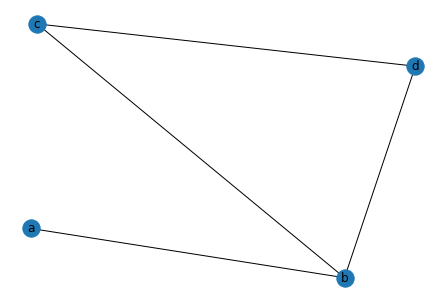

In [8]:
nx.draw(G, with_labels=True)

In [10]:
factor_ab = DiscreteFactor(['a','b'], cardinality=[10,10], values=np.random.rand(100))
G.add_factors(factor_ab)
factor_bc = DiscreteFactor(['b','c'], cardinality=[10,10], values=np.random.rand(100))
G.add_factors(factor_bc)
factor_cd = DiscreteFactor(['c','d'], cardinality=[10,10], values=np.random.rand(100))
G.add_factors(factor_cd)
factor_bd = DiscreteFactor(['b','d'], cardinality=[10,10], values=np.random.rand(100))
G.add_factors(factor_bd)

In [11]:
G.check_model()

True

In [13]:
bp = BeliefPropagation(G)

In [14]:
print(bp.query(variables=['a']))

Eliminating: b: 100%|██████████| 1/1 [00:00<00:00, 1038.71it/s]

+------+----------+
| a    |   phi(a) |
+======+==========+
| a(0) |   0.1044 |
+------+----------+
| a(1) |   0.1287 |
+------+----------+
| a(2) |   0.0919 |
+------+----------+
| a(3) |   0.1124 |
+------+----------+
| a(4) |   0.1258 |
+------+----------+
| a(5) |   0.0918 |
+------+----------+
| a(6) |   0.0926 |
+------+----------+
| a(7) |   0.0584 |
+------+----------+
| a(8) |   0.0870 |
+------+----------+
| a(9) |   0.1070 |
+------+----------+


## A simple one

In [18]:
G = MarkovModel()
G.add_nodes_from(['a','b'])
G.add_edges_from([('a','b')])
factor_ab = DiscreteFactor(['a','b'], cardinality=[2,3], values=[100,0,1,0,0,1],
                           state_names={"a":['v1','v2','v3'], "b":["u1","u2","u3"]})
G.add_factors(factor_ab)

In [19]:
G.check_model()

True

In [20]:
factor_ab.values

array([[100.,   0.,   1.],
       [  0.,   0.,   1.]])

In [21]:
G.factors

[<DiscreteFactor representing phi(a:2, b:3) at 0x7f4426a99790>]

In [23]:
bp = BeliefPropagation(G)
print(bp.query(variables=['b'], evidence={'a':'v1'}))

> /media/kz-wd-ssd/repo/pgmpy/pgmpy/factors/discrete/DiscreteFactor.py(524)reduce()
-> slice_ = [slice(None)] * len(self.variables)
(Pdb) c


0it [00:00, ?it/s]

+-------+----------+
| b     |   phi(b) |
+=======+==========+
| b(u1) |   0.9901 |
+-------+----------+
| b(u2) |   0.0000 |
+-------+----------+
| b(u3) |   0.0099 |
+-------+----------+


In [20]:
res = bp.query(variables=['b','a'])

0it [00:00, ?it/s]


In [21]:
res

<DiscreteFactor representing phi(a:2, b:3) at 0x7fa8da9297d0>

In [22]:
res.assignment([0,1])

[[('a', 'v1'), ('b', 'u1')], [('a', 'v1'), ('b', 'u2')]]

In [23]:
res.values

array([[0.98039216, 0.        , 0.00980392],
       [0.        , 0.        , 0.00980392]])

In [24]:
res.variables

['a', 'b']

In [25]:
res.cardinality

array([2, 3])

In [26]:
res.values.ravel()

array([0.98039216, 0.        , 0.00980392, 0.        , 0.        ,
       0.00980392])

In [27]:
res.get_state_names('a',0)

'v1'

In [28]:
res.name_to_no

{'a': {'v1': 0, 'v2': 1, 'v3': 2}, 'b': {'u1': 0, 'u2': 1, 'u3': 2}}

### sampling

In [13]:
from pgmpy.sampling import GibbsSampling

In [14]:
gibbs = GibbsSampling(G)

/media/kz-wd-ssd/repo/pgmpy/pgmpy/factors/discrete/DiscreteFactor.py:521: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"
/media/kz-wd-ssd/repo/pgmpy/pgmpy/sampling/Sampling.py:399: RuntimeWarning: invalid value encountered in true_divide
  kernel[tup] = reduced_factor.values / sum(reduced_factor.values)


In [15]:
list(gibbs.generate_sample(size=1))

[[State(var='a', state=0), State(var='b', state=0)]]

In [33]:
factor_ab.assignment([0,1])

[[('a', 'v1'), ('b', 'u1')], [('a', 'v1'), ('b', 'u2')]]

In [43]:
aa = list(gibbs.generate_sample(size=1))[0]
aa[0].state

0

In [34]:
factor_ab.no_to_name

{'a': {0: 'v1', 1: 'v2', 2: 'v3'}, 'b': {0: 'u1', 1: 'u2', 2: 'u3'}}

In [64]:
G.nodes.get

<bound method Mapping.get of NodeView(('a', 'b'))>